# Вариант №10

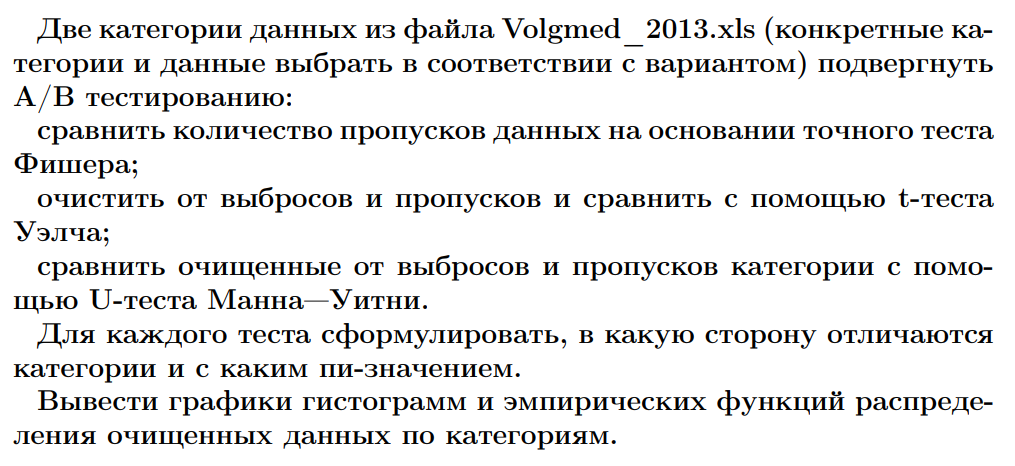

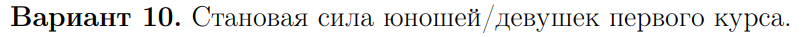

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from scipy import stats
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import statsmodels
from math import sqrt, log, exp, pi
from random import uniform

In [2]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/Volgmed_2013.xlsx', header=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12375 entries, 0 to 12374
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   № п/п                                    193 non-null    float64       
 1   Пол                                      3190 non-null   object        
 2   Год рождения                             3095 non-null   float64       
 3   Факультет                                3510 non-null   object        
 4   Курс                                     3318 non-null   float64       
 5   Группа                                   3310 non-null   float64       
 6   Год поступления                          3400 non-null   object        
 7   Дата обследования                        12009 non-null  datetime64[ns]
 8   Рост, см                                 2543 non-null   object        
 9   Вес, кг                                

In [3]:
data = data[['Курс', 'Пол', 'Становая сила, кг']]
data = data[data['Курс'] == 1]

# юноши
data_men = data[(data['Пол'] == 'муж') | (data['Пол'] == 'муж.')]['Становая сила, кг']
data_men = data_men[data_men != 'осв.']

# девушки
data_women = data[(data['Пол'] == 'жен') | (data['Пол'] == 'жен.')]['Становая сила, кг']
data_women = data_women[data_women != 'осв.']

In [4]:
# считаем пропуски
na_count_men = np.sum(pd.isna(data_men.to_numpy()))
na_count_women = np.sum(pd.isna(data_women.to_numpy()))
na_count_men, na_count_women

(11, 18)

In [5]:
# тест Фишера
table = np.array([[na_count_men, len(data_men) - na_count_men],
                  [na_count_women, len(data_women) - na_count_women]])
print(table)
print('Тест Фишера по пропускам. Априорное отношение шансов =', stats.fisher_exact(table).statistic, '; pi-значение =', stats.fisher_exact(table).pvalue)

print()
print('группа 1 - юноши, группа 2 - девушки')
# вывод на основе полученных результатов
if stats.fisher_exact(table).pvalue < 0.05:
    if na_count_men < na_count_women:
        conclusion = "В группе 1 пропуски появляются реже, чем в группе 2."
    else:
        conclusion = "В группе 2 пропуски появляются реже, чем в группе 1."
else:
    conclusion = "Нет статистически значимых различий в количестве пропусков между группами."

print(conclusion)

[[ 11 269]
 [ 18 746]]
Тест Фишера по пропускам. Априорное отношение шансов = 1.694754233787691 ; pi-значение = 0.20096452399146014

группа 1 - юноши, группа 2 - девушки
Нет статистически значимых различий в количестве пропусков между группами.


In [6]:
# избавляемся от пропусков
data_men = data_men.dropna(how='any')
data_women = data_women.dropna(how='any')

data_men = data_men.astype(float)
data_women = data_women.astype(float)

# избавляемся от выбросов
array=data_men.to_numpy()
q_025 = np.quantile(array, 0.25)
q_075 = np.quantile(array, 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd

print('Верхняя граница муж.=', upper_limit)
print('Нижняя граница муж.=', lower_limit)
data_men = data_men[(data_men < upper_limit) & (data_men > lower_limit)]


array=data_women.to_numpy()
q_025 = np.quantile(array, 0.25)
q_075 = np.quantile(array, 0.75)
iqd = q_075 - q_025
upper_limit = q_075 + 1.5 * iqd
lower_limit = q_025 - 1.5 * iqd

print()
print('Верхняя граница жен.=', upper_limit)
print('Нижняя граница жен.=', lower_limit)
data_women = data_women[(data_women < upper_limit) & (data_women > lower_limit)]

Верхняя граница муж.= 162.5
Нижняя граница муж.= 62.5

Верхняя граница жен.= 87.5
Нижняя граница жен.= 27.5


In [7]:
# t-тест Уэлча
ttest = stats.ttest_ind(data_men, data_women, equal_var=False)
print('t-тест Уэлча:', ttest.statistic)
print('p-значение:', ttest.pvalue)
print('число степеней свободы, используемых при расчете t-статистики:', ttest.df, '\n')

print('мат. ожидание группы 1 больше чем у группы 2, достигнутый уровень значимости:', ttest.pvalue)
data_men.mean(), data_women.mean()

t-тест Уэлча: 41.13243135845684
p-значение: 6.975538162778939e-135
число степеней свободы, используемых при расчете t-статистики: 344.0606123478598 

мат. ожидание группы 1 больше чем у группы 2, достигнутый уровень значимости: 6.975538162778939e-135


(110.18796992481202, 56.72600834492351)

In [8]:
# U-тест Манна—Уитни
utest = stats.mannwhitneyu(data_men, data_women)
print('U-статистика Манна-Уитни:', utest.statistic)
print('p-значение:', utest.pvalue, '\n')

print('медиана группы 1 больше чем у группы 2, достигнутый уровень значимости:', utest.pvalue)
data_men.median(), data_women.median()

U-статистика Манна-Уитни: 189469.0
p-значение: 2.0257553605197253e-124 

медиана группы 1 больше чем у группы 2, достигнутый уровень значимости: 2.0257553605197253e-124


(110.0, 55.0)

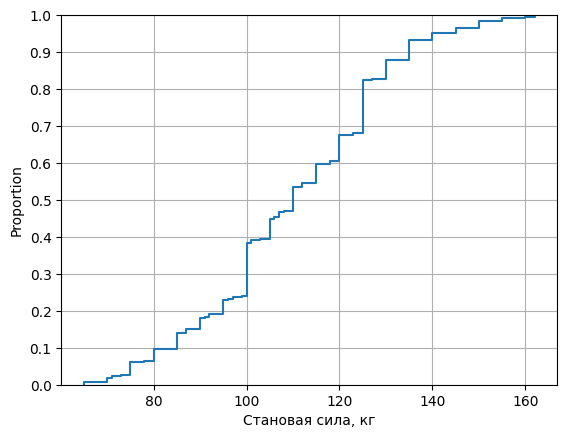

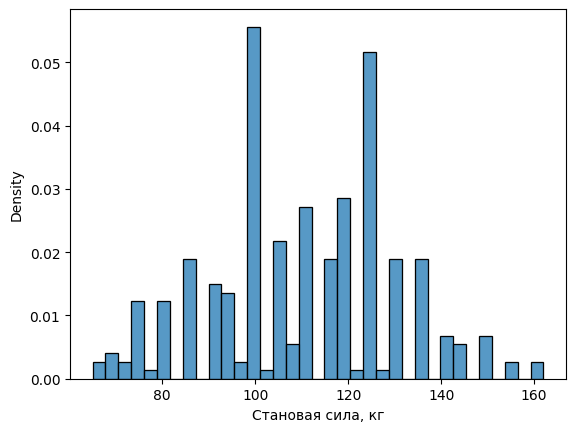

In [9]:
# юноши
ax = sns.ecdfplot(data_men)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.show()
sns.histplot(data_men, bins=35, kde=False, stat="density")
plt.show()

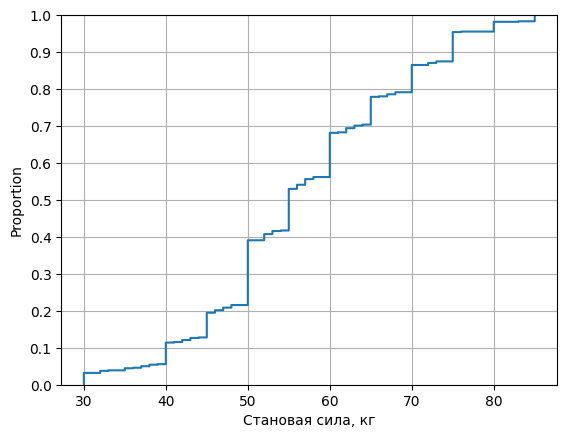

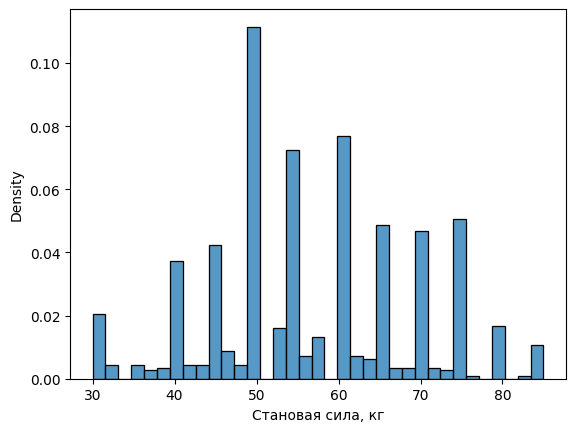

In [10]:
# девушки
ax = sns.ecdfplot(data_women)
ax.axes.set_yticks(np.arange(start=0, stop=1.1, step=0.1))
ax.grid()
plt.show()
sns.histplot(data_women, bins=35, kde=False, stat="density")
plt.show()